In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from torch.ao.nn.quantized.functional import threshold


In [2]:
result = pd.read_csv('final_merged.csv')

original_data = pd.read_csv('train_data_0_20.csv')
# Normalize the date format in `original_data`
original_data['date'] = pd.to_datetime(original_data['date'], format='%Y/%m/%d').dt.strftime('%Y-%m-%d')

# Merge original `close` values back to `result` based on `date` and `tic`
result = result.merge(original_data[['date', 'tic', 'close']],
                      on=['date', 'tic'],
                      how='left',
                      suffixes=('', '_original'))

# Update only the 'close' column in `result`
result['close'] = result['close_original']

result



/var/folders/rk/wm0jqkg16wgg146w5t5kkx340000gn/T/ipykernel_53905/1619360904.py:3: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  original_data = pd.read_csv('train_data_0_20.csv')


,Unnamed: 0,date,tic,month,close,volume,macd,boll_ub,boll_lb,rsi_30,...,sentiment,ATR,Price_Change,DBSCAN_Anomaly,OCSVM_Anomaly,IsolationForest_Anomaly,Autoencoder_Anomaly,stat_anomaly,anomaly,close_original
0,0,2015-10-20,ARL,2015-10,5.910000,-0.165433,-0.279741,-0.738759,-0.772951,-1.237234,...,0.066251,-1.248227,0.028909,0,0,0,0,0,0.000000,5.910000
1,1,2015-10-20,BH,2015-10,247.333328,-0.150340,1.081444,4.732676,5.041078,-0.173815,...,0.066251,1.064206,0.117742,0,0,0,1,0,0.000000,247.333328
2,2,2015-10-20,CIX,2015-10,8.025624,-0.175494,-0.023806,-0.722450,-0.702156,-0.396184,...,0.066251,-0.201969,-0.005259,0,0,0,0,0,0.000000,8.025624
3,3,2015-10-20,FDBC,2015-10,17.838503,-0.156629,0.102387,-0.494830,-0.450392,2.439890,...,0.066251,0.215591,0.062464,0,0,0,0,0,0.000000,17.838503
4,4,2015-10-20,GEF,2015-10,24.485619,1.898014,-0.099963,-0.330911,-0.312719,-0.457348,...,0.066251,1.740675,-0.245632,0,0,0,1,0,0.000000,24.485619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37888,37888,2024-08-29,STRS,2024-08,27.379999,-0.059787,0.215240,-0.289308,-0.311530,0.101036,...,-0.073468,-0.909164,-1.016642,0,0,0,0,0,0.995313,27.379999
37889,37889,2024-08-29,SWKH,2024-08,17.500000,-0.007802,-0.069213,-0.513331,-0.468180,-0.356293,...,-0.073468,-1.155156,-0.073595,0,0,0,0,0,0.400478,17.500000
37890,37890,2024-08-29,TCI,2024-08,30.100000,-0.150340,-0.290857,-0.232627,-0.207825,-0.948085,...,-0.073468,-1.042085,-0.599788,0,0,0,0,0,0.126658,30.100000
37891,37891,2024-08-29,VABK,2024-08,39.297653,-0.059787,0.809882,0.017574,0.014990,1.458050,...,-0.073468,-0.897940,-0.114598,0,0,0,0,0,0.844299,39.297653


In [7]:
def plot_anomalies(tickers):
    # Define the grid size based on the number of tickers
    rows, cols = 5, 4  # Adjust based on layout preferences (e.g., 5x4 for 20 slots, leaving 3 empty)
    fig, axs = plt.subplots(rows, cols, figsize=(20, 15))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    for i, tic in enumerate(tickers):
        # Get the data for the current ticker
        data = result[result['tic'] == tic]
        
        # Calculate the row and column indices for this subplot
        row, col = divmod(i, cols)
        
        # Plot the closing price
        axs[row, col].plot(data['date'], data['close'], label='Close Price', color='blue')
        
        # Mark anomaly points
        threshold = 0.98
        anomaly = data[data['anomaly'] > threshold]
        print(len(anomaly)/len(data))
        axs[row, col].scatter(anomaly['date'], anomaly['close'], color='red', label='Anomaly')
        
        # Set the title for each subplot
        axs[row, col].set_title(f'{tic} Anomaly Detection')
        axs[row, col].set_xlabel('Date')
        axs[row, col].set_ylabel('Close Price')
        
    # Turn off any unused subplots if there are empty spaces
    for j in range(i + 1, rows * cols):
        fig.delaxes(axs.flatten()[j])

    plt.show()



0.03992821893225662
0.0462090623598026
0.048900852400179454
0.04306864064602961
0.049349484073575596
0.04531179901301032
0.04576043068640646
0.04845222072678331
0.0462090623598026
0.03768506056527591
0.029161058770749215
0.05024674742036788
0.048900852400179454
0.04576043068640646
0.048900852400179454
0.04172274562584118
0.03947958725886048


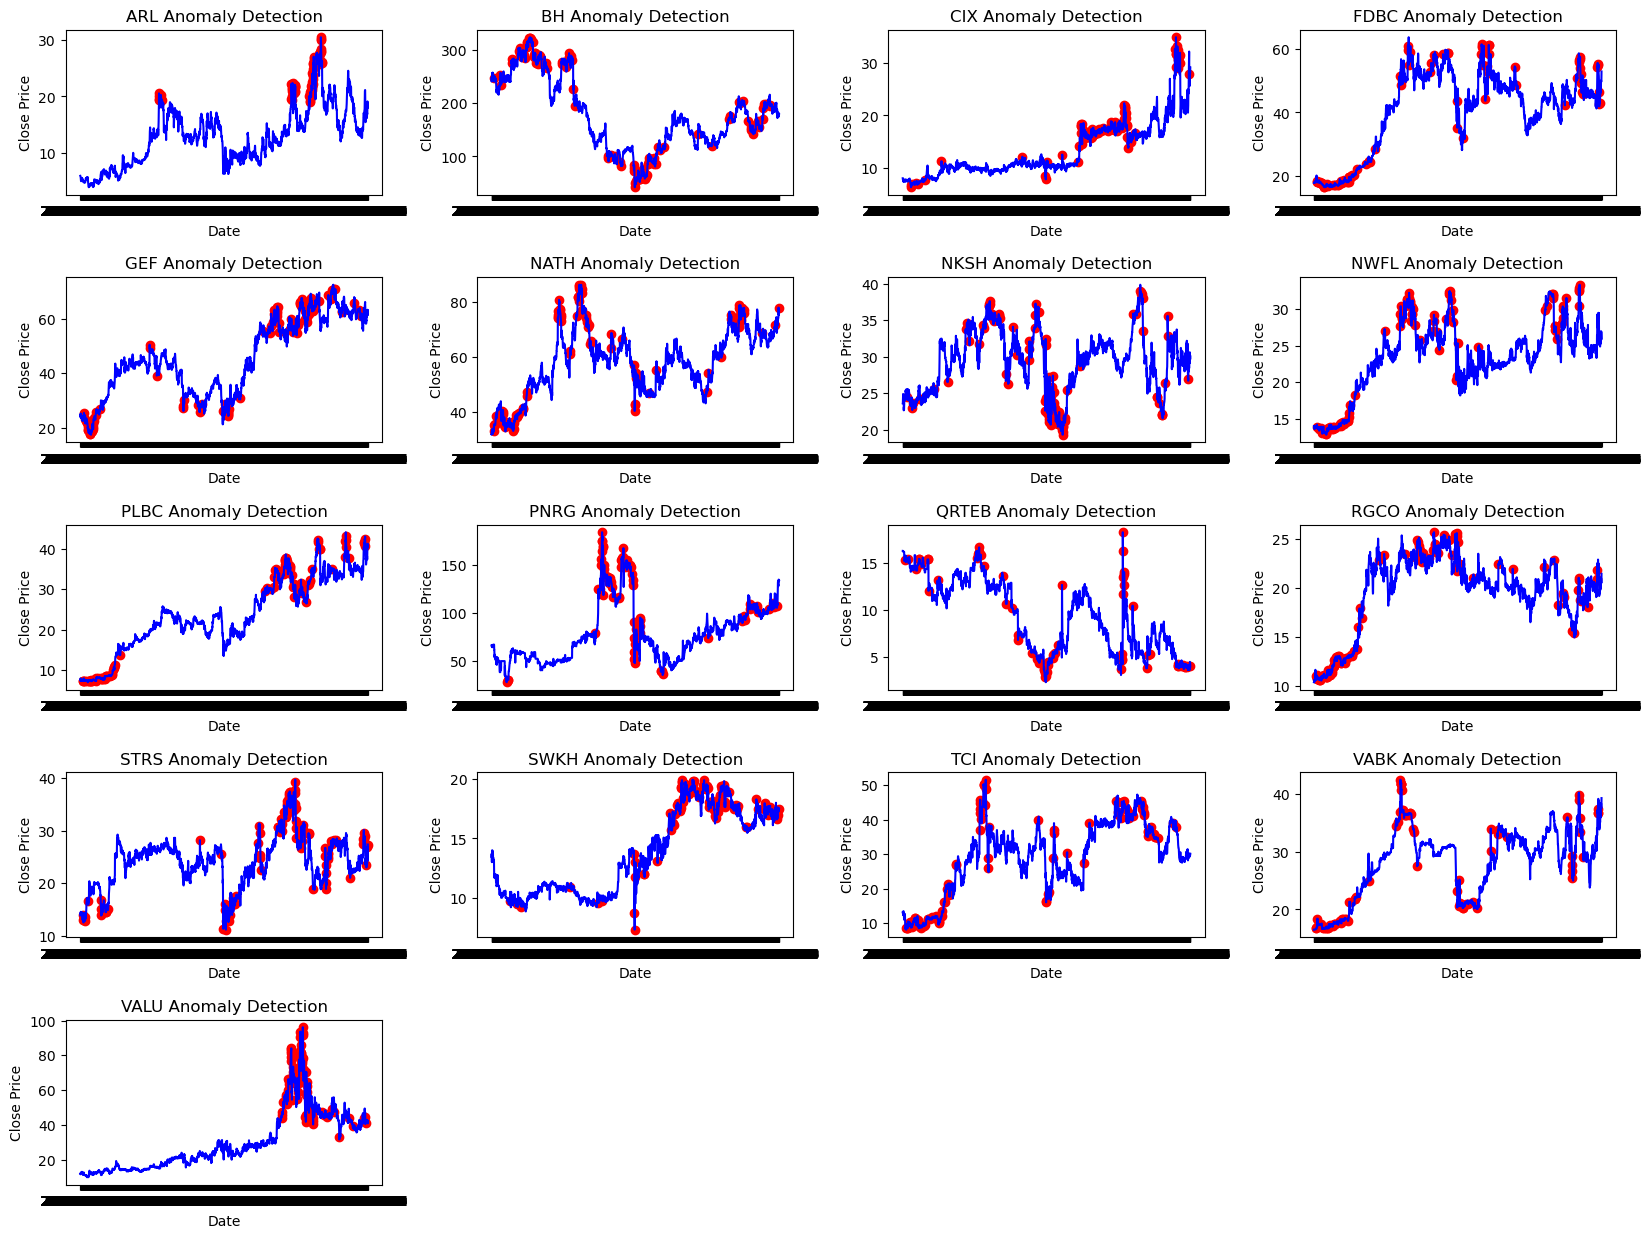

In [8]:
# List of 17 tickers
tickers = result.tic.unique().tolist()
plot_anomalies(tickers)